In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [2]:
df = pd.read_excel("Задания/Datasets/surgery.xlsx")
df.columns = ['Before operation V right', 'Before operation V left', 'After operation V right', 'After operation V left']
df = df.drop([0])
print(df.shape)
df = df.fillna(df.mean())
df.head(20)

(94, 4)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_63669/758082421.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(df.mean())


,Before operation V right,Before operation V left,After operation V right,After operation V left
1,7.2,6.70,12.000000,13.100000
2,1.2,1.20,4.500000,4.200000
3,6.7,7.30,15.300000,14.900000
4,9.9,10.05,9.600000,9.100000
5,3.1,2.13,14.794943,14.372644
6,1.5,1.80,3.900000,4.200000
7,3.3,7.80,4.750000,6.100000
8,4.3,5.10,8.700000,10.600000
9,5.6,4.10,11.200000,11.100000
10,4.8,5.30,13.400000,11.800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 1 to 94
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Before operation V right  94 non-null     float64
 1   Before operation V left   94 non-null     float64
 2   After operation V right   94 non-null     float64
 3   After operation V left    94 non-null     float64
dtypes: float64(4)
memory usage: 3.1 KB


In [4]:
df.isnull().sum()

Before operation V right    0
Before operation V left     0
After operation V right     0
After operation V left      0
dtype: int64

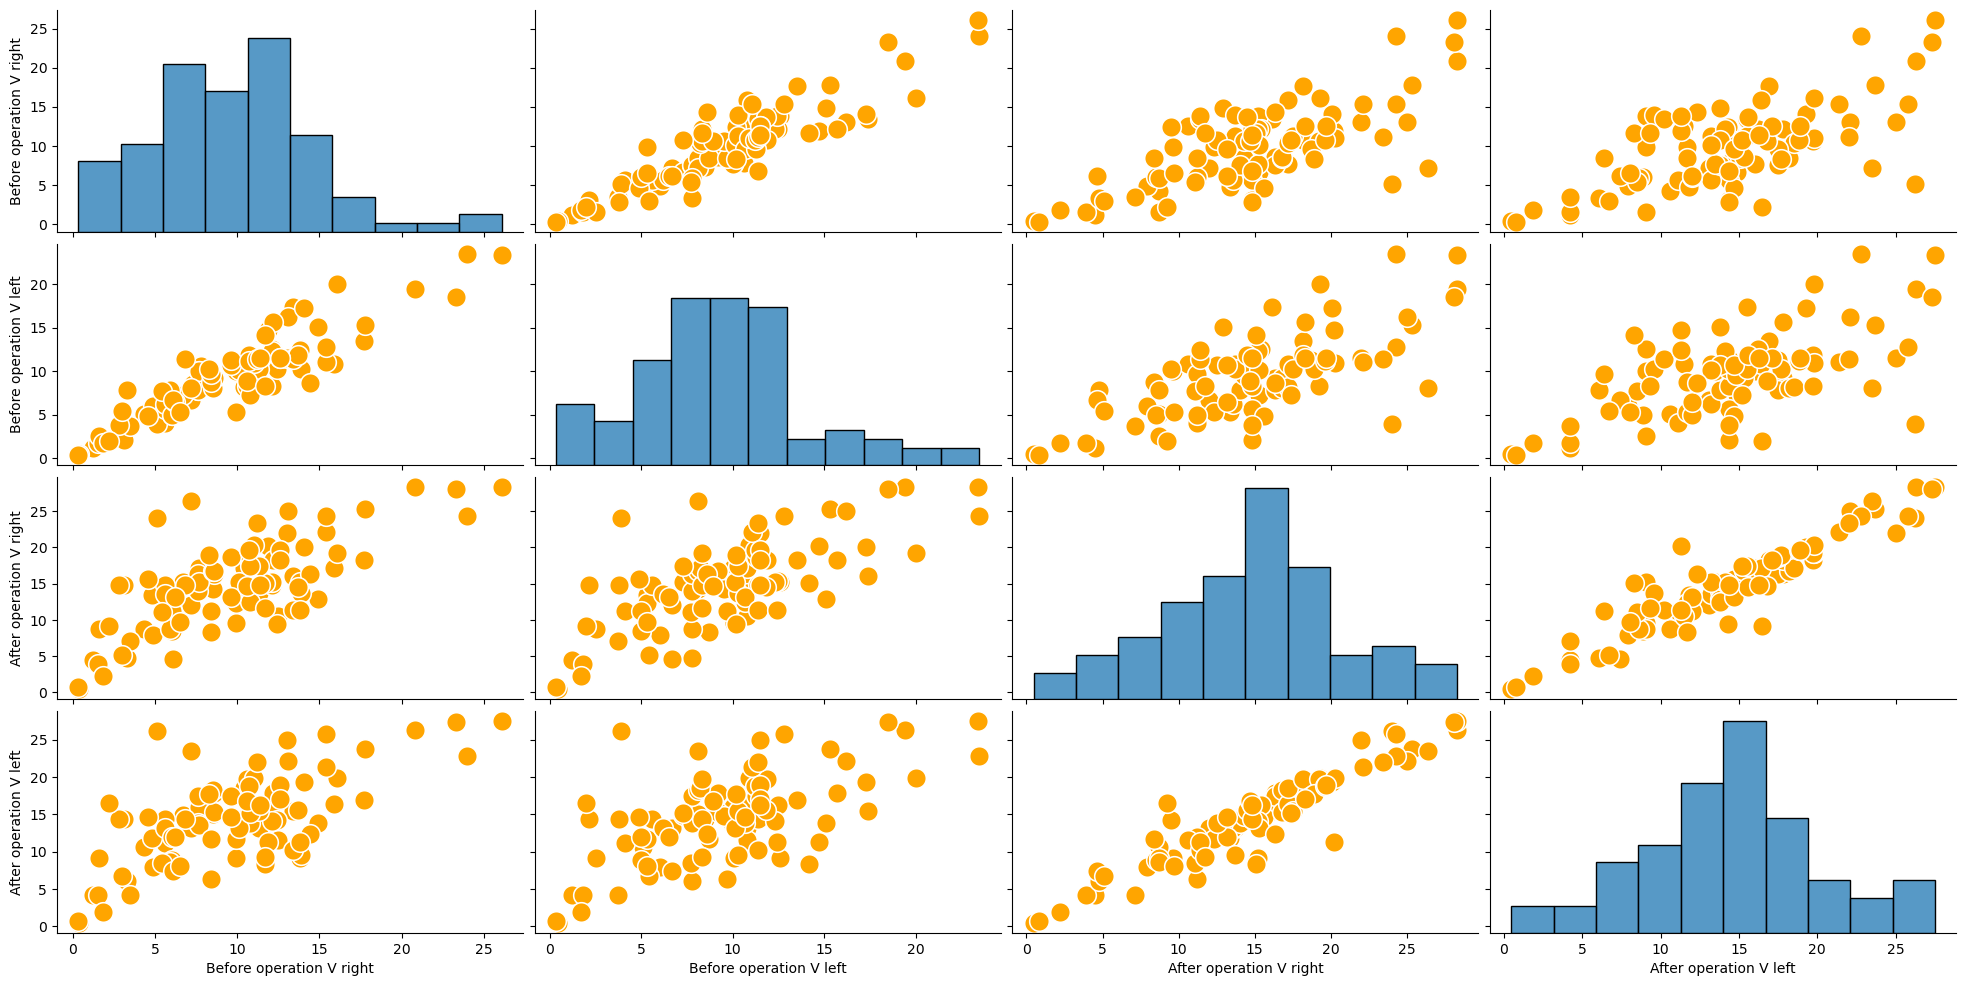

In [5]:
sns.pairplot(df, plot_kws={'color': 'orange', 's': 200}, aspect=2)  
# aspect — width-to-height ratio
# s — size of the points
plt.show()

In [6]:
# Shapiro-Wilk test for each numerical column
for column in df.columns:
    stat, p = stats.shapiro(df[column])
    print(f'Shapiro-Wilk for {column}:')
    print('Statistic:', stat, 'p-value:', p)
    
    if p < 0.05:
        print("No normal distribution")
    else:
        print("There is a normal distribution")
    print()  # Just for better readability

Shapiro-Wilk for Before operation V right:
Statistic: 0.9662055458981815 p-value: 0.015594054010814835
No normal distribution

Shapiro-Wilk for Before operation V left:
Statistic: 0.9678732302883999 p-value: 0.020537105328684847
No normal distribution

Shapiro-Wilk for After operation V right:
Statistic: 0.9820383638652058 p-value: 0.2244402524631852
There is a normal distribution

Shapiro-Wilk for After operation V left:
Statistic: 0.9856207818672426 p-value: 0.3953230729850086
There is a normal distribution



In [7]:
# Create data in the form of a 2x2 contingency table
# Men: Prefer and Do Not Prefer
# Women: Prefer and Do Not Prefer
data = np.array([[10, 20],  # Men
                 [5,  15]]) # Women

# Perform Fisher's test
odds_ratio, p_value = stats.fisher_exact(data)

print(f"Odds Ratio: {odds_ratio}")
print(f"p-value: {p_value}")

Odds Ratio: 1.5
p-value: 0.7536263339838003


In [8]:
# Fisher's test

successful_operations_right_left = (
    (df['Before operation V left'] < df['After operation V left']) &
    (df['Before operation V right'] < df['After operation V right'])
)
success_count = np.sum(successful_operations_right_left)

successful_operations_left = (
    (df['Before operation V left'] < df['After operation V left']) &
    (df['Before operation V right'] >= df['After operation V right'])
)
success_count_left = np.sum(successful_operations_left)

successful_operations_right = (
    (df['Before operation V left'] >= df['After operation V left']) &
    (df['Before operation V right'] < df['After operation V right'])
)

success_count_right = np.sum(successful_operations_right)

unsuccessful_operations = (
    (df['Before operation V left'] >= df['After operation V left']) &
    (df['Before operation V right'] >= df['After operation V right'])
)

unsuccess_count = np.sum(unsuccessful_operations)

# Create a contingency table for Fisher's test
# 2x2 table: successful and unsuccessful operations
success_matrix = np.array([
    [success_count, success_count_right],   # Successful and unsuccessful
    [success_count_left, unsuccess_count]    # Unsuccessful and unsuccessful (essentially all others)
])

# Perform Fisher's test
odds_ratio, p_value = stats.fisher_exact(success_matrix)

# Calculate success probability
success_rate = success_count / len(df)

print(f"Number of successful operations: {success_count}")
print(f"Number of unsuccessful operations: right -> {success_count_left}, left -> {success_count_right}, both right and left -> {unsuccess_count}")
print(f"Total number of operations: {success_count + success_count_left + success_count_right + unsuccess_count}")
print(f"Total number of operations in the database: {len(df)}")
print(f"Probability of successful operation: {success_rate:.2%}")
print(f"Odds Ratio: {odds_ratio}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("Null hypothesis is rejected.")
else:
    print("Null hypothesis is not rejected.")
print() 

Number of successful operations: 76
Number of unsuccessful operations: right -> 5, left -> 8, both right and left -> 5
Total number of operations: 94
Total number of operations in the database: 94
Probability of successful operation: 80.85%
Odds Ratio: 9.5
p-value: 0.003979602584260489
Null hypothesis is rejected.

